In [59]:
#!/usr/bin/env python
"""
Generic python script.
"""
__author__ = "Alex Drlica-Wagner"
import os
from io import StringIO
from collections import OrderedDict as odict
import numpy as np
import pylab as plt
import matplotlib

from matplotlib.patches import Ellipse, PathPatch, Rectangle
from matplotlib.path import Path
matplotlib.rcParams['text.usetex'] = True

COLORS = odict([
    ('blue','#1F77B4'),  # This is original T10 "tab:blue"
    ('gray','#7F7F7F'),  # This is original T10 "tab:gray"
    ('orange','orange'),
    ('gold','orange'),
    ('red','#FA0303'),   # T10 color is #D62728
    ('black','k'),   # T10 color is #D62728
])
ALPHA = 0.35
LINEWIDTH = 2

DEFAULTS = dict(color=COLORS['blue'],alpha=ALPHA,linewidth=LINEWIDTH)

def get_datadir():
    """Get the data directory. Could live here or up one level."""
    if os.path.exists('./data'):
        return './data'
    elif os.path.exists('../data'):
        return '../data'
    else:
        raise IOError("Data directory not found.")

def get_datafile(filename):
    """Get a data file."""
    datadir = get_datadir()
    path = os.path.join(datadir,filename)
    if not os.path.exists(path):
        raise IOError("Data file not found: %s"%path)
    return path

def setdefaults(kwargs,defaults):
    for k,v in defaults.items():
        kwargs.setdefault(k,v)
    return kwargs

def get_mass_limit(data):
    mass,limit = np.genfromtxt(StringIO(data['xystring'])).T
    if data.get('mass_unit') == 'gram':
        mass /= 2e33
    elif data.get('mass_unit') == 'tev':
         mass *= 1e3
    return mass, limit

def plot_text(data):
    kwargs = dict(ha='center',  va='top', rotation=data.get('rotation',0))
    return plt.text(float(data['label_x']),
                    float(data['label_y']),
                    data['style']['label'],
                    **kwargs
                    )

def plot_limit(data):
    mass,limit = get_mass_limit(data)
    kwargs = dict(**data['style'])
    plt.plot(mass, limit, **kwargs)
    plot_text(data)

def plot_limit_fill(data, low=False):
    mass,limit = get_mass_limit(data)

    kwargs = dict(**data['style'])
    setdefaults(kwargs,DEFAULTS)

    plt.fill_between(mass, limit, y2 = 1 if not low else 0,
                     edgecolor=kwargs['color'],
                     facecolor=kwargs['color'],
                     alpha=kwargs['alpha'],
    )
    #plot_text(data)


def plot_lsst_limit(data, low=False):
    kwargs = dict(**data['style'])
    setdefaults(kwargs,DEFAULTS)

    mass,limit = get_mass_limit(data)
    kwargs['alpha'] = 0.15
    plt.fill_between(mass, limit, y2 = 1 if not low else 0,
                     edgecolor=kwargs['color'],
                     facecolor=kwargs['color'],
                     #facecolor='none', hatch = '/',
                     alpha=kwargs['alpha'],
    )
    #plot_text(data)

    kwargs['alpha'] = 1
    plt.plot(mass, limit, **kwargs)


def plot_limit_patch(data):
    kwargs = dict(**data['style'])
    setdefaults(kwargs,DEFAULTS)

    mass,limit = get_mass_limit(data)
    patch = PathPatch(Path(zip(mass, limit)),
                      edgecolor=kwargs['color'],
                      facecolor=kwargs['color'],
                     alpha=kwargs['alpha'])
    plt.gca().add_artist(patch)
    plot_text(data)

def plot_one(data):
    kwargs = dict(**data['style'])
    setdefaults(kwargs,DEFAULTS)

    mass,limit = get_mass_limit(data)
    plt.fill_between(mass, limit, y2=1.0,
                     edgecolor=COLORS['gray'],
                     facecolor=COLORS['gray'],
                     alpha=kwargs['alpha'])
    #plot_text(data)

def plot_two(data_loose, data_tight):
    kwargs = dict(**data_loose['style'])
    setdefaults(kwargs,DEFAULTS)

    mass_loose,limit_loose = get_mass_limit(data_loose)
    mass_tight,limit_tight = get_mass_limit(data_tight)

    # Interpolate the data to a common grid
    x_min = np.min((np.min(mass_loose), np.min(mass_tight)))
    x_max = np.max((np.max(mass_loose), np.max(mass_tight)))
    x = np.logspace(np.log10(x_min), np.log10(x_max), num=100)
    limit_loose_interp = np.interp(x, mass_loose, limit_loose)
    limit_tight_interp = np.interp(x, mass_tight, limit_tight)

    plt.fill_between(mass_loose, limit_loose, y2=1.0,
                     edgecolor=COLORS['blue'],
                     facecolor=COLORS['blue'],
                     alpha=kwargs['alpha'])
    plt.fill_between(x, limit_tight_interp, limit_loose_interp,
                     edgecolor='k',
                     linewidth=0,
                     facecolor='k',
                     alpha=0.07)
    plot_text(data_loose)

In [60]:
def logsense(m,m0,mr):
    return 1.0/(1.0 + (m/m0)**(-1.0/mr))


newconstraints = np.loadtxt('test.txt')
DDconstraints = np.power(10, np.loadtxt('rescaled_DD_mass_q1.0.txt'))*0.06
M = np.logspace(-4, 7, num = 20)

newconstraints = newconstraints/logsense(M,1e-2,0.5)
DDconstraints = DDconstraints/logsense(M,1e-2,0.5)

M = np.append(3e-5, M)
newconstraints = np.append(1, newconstraints)
DDconstraints = np.append(1, DDconstraints)




In [61]:
print(M, DDconstraints/logsense(M,1e-2,0.5))

[3.00000000e-05 1.00000000e-04 3.79269019e-04 1.43844989e-03
 5.45559478e-03 2.06913808e-02 7.84759970e-02 2.97635144e-01
 1.12883789e+00 4.28133240e+00 1.62377674e+01 6.15848211e+01
 2.33572147e+02 8.85866790e+02 3.35981829e+03 1.27427499e+04
 4.83293024e+04 1.83298071e+05 6.95192796e+05 2.63665090e+06
 1.00000000e+07] [1.11112111e+05 5.22794870e+00 5.94145328e-02 1.00912574e-03
 5.20161385e-05 2.25639043e-05 5.42916239e-05 1.08718533e-04
 1.40639553e-04 1.35588330e-04 1.12220028e-04 8.21676343e-05
 5.56099098e-05 3.62027064e-05 2.34154190e-05 1.57882538e-05
 1.15558463e-05 9.33938492e-06 8.17449739e-06 7.66966739e-06
 7.42966419e-06]


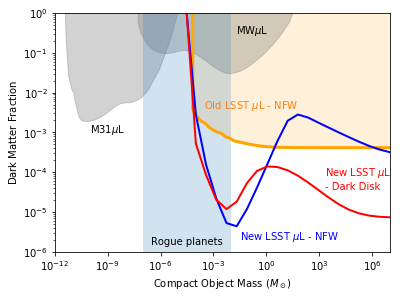

In [66]:
#!/usr/bin/env python
"""
Plot dark matter mass vs indirect detection annihilation cross section.
"""
import matplotlib.pylab as plt
import numpy as np
import yaml
from matplotlib import rc
rc("text", usetex=False)

#from lsstplot import plot_one, plot_two, plot_limit, plot_lsst_limit

fig,ax = plt.subplots(figsize=(6,4))
ax.set_yscale('log')
ax.set_xscale('log')

limits = yaml.load(open('macho_limits.yaml'))

#plot_limit(limits['lsst_m31_microlensing'])
#plot_limit(limits['lsst_paralensing'])
#plot_limit(limits['lsst_microlensing'])

plot_lsst_limit(limits['lsst_microlensing'])
#plot_limit(limits['lsst_paralensing'])


#plot_two(limits['gammaray_background_loose_carr_2016'],
#         limits['gammaray_background_tight_carr_2016'])
#plot_one(limits['gammaray_femtolens_carr_2016'])
#plot_two(limits['ns_capture_loose_capela_2013'],
#         limits['ns_capture_tight_capela_2013'])
plot_one(limits['hsc_niikura_2017'])
#plot_two(limits['eridanus_brandt_2016_loose'],
#         limits['eridanus_brandt_2016_tight'])
#plot_two(limits['lensed_sn_garcia-bellido_2017_loose'],
#         limits['lensed_sn_zumalacarregui_2018_tight'])
#plot_two(limits['lensed_sn_garcia-bellido_2017_loose'],
#         limits['lensed_sn_zumalacarregui_2018_tight'])
plot_one(limits['eros_tisserand_2007'])
#plot_two(limits['binaries_quinn_2009_loose'],
#         limits['binaries_yoo_2003_tight'])
#plot_two(limits['plank_ali-haimoud_2016_loose'],
#         limits['cmb_ricotti_2008_tight'])
#plot_one(limits['disk_lacey_1985'])

rect = Rectangle((1e-7,0), (1e-2-1e-7), 1, alpha=0.2)
ax.add_patch(rect)
plt.text(3e-7,1.5e-6, 'Rogue planets')

plt.plot(M, newconstraints, lw = '2', c = 'b', label = 'NFW profile')
plt.plot(M, DDconstraints, lw = '2', c = 'r', label = 'Dark Disk profile')

#plt.legend()
plt.text(0.03, 2e-6, 'New LSST $\mu$L - NFW', color = 'b')
plt.text(2e3, 4e-5, 'New LSST $\mu$L\n- Dark Disk', color = 'r')
plt.text(3e-4, 4e-3, 'Old LSST $\mu$L - NFW', color = 'tab:orange')

plt.text(2e-2, 3e-1, 'MW$\mu$L')
plt.text(1e-10, 1e-3, 'M31$\mu$L')

plt.xlim(1e-12, 1e7)
plt.ylim(1e-6, 1.0)
plt.xlabel(r'${\rm Compact\ Object\ Mass}\ (M_\odot)$',fontsize=10)
plt.ylabel(r'${\rm Dark\ Matter\ Fraction}$', fontsize=10)
plt.subplots_adjust(top=0.95, bottom=0.12)

plt.savefig('./figures/lsst_macho_limits.png')
plt.show()
#plt.ion()